In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

df = pd.read_csv('BostonHousing.csv')

In [28]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [30]:
x = df.loc[:, df.columns !='medv'].values
y = df.loc[:,df.columns == 'medv'].values
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = 45, test_size = 0.25)

In [32]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
model = Sequential(layers=[Dense(128, input_shape=(13,),activation='relu', name='dense_1'),Dense(64,activation='relu',name='dense_2'),Dense(1, activation='linear', name='dense_3')])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05,verbose='auto')
y_pred=model.predict(x_test)

Epoch 1/100
12/12 [==============================] - 3s 55ms/step - loss: 546.3890 - mae: 21.6750 - val_loss: 396.6378 - val_mae: 16.9074
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 467.8003 - mae: 19.7324 - val_loss: 320.6691 - val_mae: 14.5914
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 363.9994 - mae: 17.0106 - val_loss: 238.2213 - val_mae: 12.4623
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 239.8568 - mae: 13.4219 - val_loss: 166.0531 - val_mae: 10.5140
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 133.6856 - mae: 9.5227 - val_loss: 127.6884 - val_mae: 9.8142
Epoch 6/100
12/12 [==============================] - 0s 14ms/step - loss: 76.2766 - mae: 6.8955 - val_loss: 100.1668 - val_mae: 8.8121
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 55.1359 - mae: 5.5588 - val_loss: 64.4091 - val_mae: 7.0157
Epoch 8/100
12/12 [========================

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = Sequential(layers=[Dense(128,input_shape=(13,),activation='relu',name='dense_1'), Dense(64, activation='relu',name='dense_2'),Dense(1, activation='linear',name='dense_output')])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()
y_pred = model.predict(x_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step


In [21]:
model.fit(x_train, y_train,epochs=100, validation_split=0.05,verbose='auto')

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 566.1937 - mae: 22.1050 - val_loss: 419.8339 - val_mae: 17.7086
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 503.2823 - mae: 20.6963 - val_loss: 360.6085 - val_mae: 15.8581
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 425.3717 - mae: 18.8511 - val_loss: 288.4258 - val_mae: 14.0767
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 322.3968 - mae: 16.1083 - val_loss: 205.8387 - val_mae: 11.8741
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 202.5614 - mae: 12.2799 - val_loss: 135.4812 - val_mae: 9.0795
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 110.1379 - mae: 8.2976 - val_loss: 104.6338 - val_mae: 8.6653
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 66.7953 - mae: 6.1947 - val_loss: 90.9444 - val_mae: 8.1280
Epoch 8/100
12/12 [============================

4/4 [==============================] - 0s 7ms/step - loss: 14.1755 - mae: 2.7194
14.175531387329102
2.7193710803985596


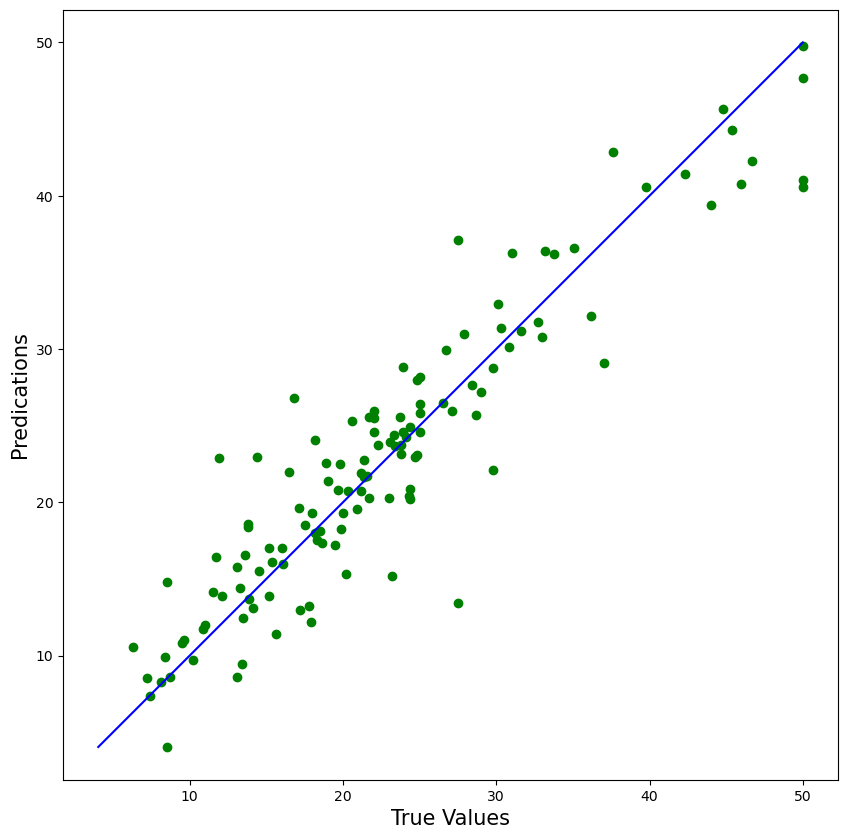

In [40]:
mae,mse=model.evaluate(x_test,y_test)
print(mae)
print(mse)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')

p1= max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predications', fontsize=15)
plt.axis('equal')
plt.show()